<a href="https://colab.research.google.com/github/sarodeshreyash/Play-Store-App-Review-Analysis/blob/main/Google_Play_Store_Data_Analysis(Team).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## -Android is being adopted by a large population across the globe. Android is used in over 74% of the world market, so it's worth creating or developing apps for this mobile operating system.
## -It's also worth investing in apps if you expect them to gain wider traction in the future. To make sure apps are tailored to the needs of users the analysis of data from the Google Play Store apps is extremely valuable. 
## -It can help developers design apps that are tailored to what users want and investors with decisions about how best to invest in future.
## -</b> Let's start the working on Data. </b>

In [91]:
#import important librabries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
#mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
#Read the data from google drive
ps_df=pd.read_csv('/content/drive/MyDrive/Almabetter/capstone 1/Play Store Data.csv')

In [94]:
#See the overview of the dataframe
ps_df.head()



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [95]:
ps_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [96]:
#We call this the shape method, which provides the number of columns and rows (rows and columns) format.
ps_df.shape

(10841, 13)

The above code shows that we have 10841 columns and 13 rows.

In [97]:
# call info() function
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


We get the number of non-null values in columns and the dtype of the column.

In [98]:
# learn more about column names to call columns name
ps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Let us first define what information the columns contain based on our inspection.
play_store dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:
1. **App** - It tells us about the name of the application with a short description (optional).

2. **Category** - It gives the category to the app.

3. **Rating** - It contains the average rating the respective app received from its users.

4. **Reviews** - It tells us about the total number of users who have given a review for the application.

5. **Size** - It tells us about the size being occupied the application on the mobile phone.

6. **Installs** - It tells us about the total number of installs/downloads for an application.

7. **Type** - IIt states whether an app is free to use or paid.

8. **Price** - It gives the price payable to install the app. For free type apps, the price is zero.

9. **Content Rating** - It states whether or not an app is suitable for all age groups or not.

10. **Genres** - It tells us about the various other categories to which an application can belong.

11. **Last Updated** - It tells us about the when the application was updated.

12. **Current Ver** - It tells us about the current version of the application.
13.**Android Ver** - It tells us about the android version which can support the application on its platform.

In [99]:
# Statistical inference from a dataset 
ps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# **Data Cleaning**

We will mostly be working with these columns: "Rating", "Size", "Installs", "Price".First we clean up all the nan values in this column, either replace them with some other value or remove all the special characters that are present in the particular column. Let's clean up by removing these and converting each column to a numeric type.

In [100]:
# Make a dataframe to gain insight into the data. 
ps_df1=pd.DataFrame(index=ps_df.columns)
ps_df1["DataType"]=ps_df.dtypes
ps_df1["not_null"]=ps_df.count()
ps_df1["null"]=ps_df.isnull().sum()
ps_df1

,DataType,not_null,null
App,object,10841,0
Category,object,10841,0
Rating,float64,9367,1474
Reviews,object,10841,0
Size,object,10841,0
Installs,object,10841,0
Type,object,10840,1
Price,object,10841,0
Content Rating,object,10840,1
Genres,object,10841,0


Inference:


Rating columns has 1474 null values.type has 1.content rating has 1 current ver has 8. android ver has 3 null values

Reviews,Size, Intalls, and Price have default datatypes. We want to convert them into numeric datatypes.
and removed all the special characters present in these columns, which made them default datatype.

# Handling the NaN values

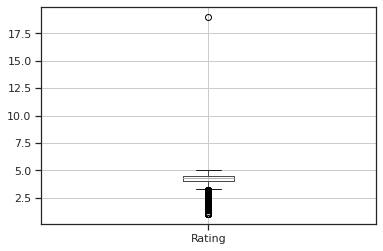

In [101]:
#First go with Rating Column
# lets plot a Box plot for rating column to get some idea about the rating columns
ps_df.boxplot()

A box plot is a method for graphically depicting groups of numerical data through their quartiles.This represents the average of this numerical data.


-From above observasion we can see there are values which are greater than 5. The rating of every app has to be max 5 and not greater than it so lets try to find out this outlier.

In [102]:
ps_df[(ps_df['Rating'] <1) | (ps_df['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Above cell we see the rating of the particular app is 19, which is practically impossible. We all know that. There is also a NaN value in the Content Rating and Android Verification Column. This data insight shows that this row is not useful for this analysis. 

In [103]:
#Remove this row. 
ps_df.drop(10472,axis=0,inplace=True)

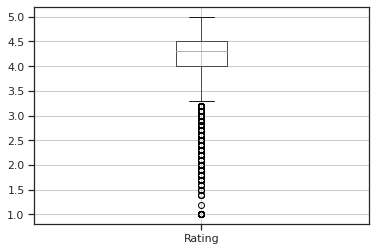

In [104]:
# Lets check do i successfully droped the unwanted column 
ps_df.boxplot();

In [105]:
#rating has 1473 null values remaining lets find mean and median of the rating column
mean_of_rating=ps_df['Rating'].mean()
print(f"The mean of Rating Column {mean_of_rating}")
median_of_rating=ps_df['Rating'].median()
print(f"The median of Rating Column {median_of_rating}")

The mean of Rating Column 4.191757420456972
The median of Rating Column 4.3


   

*   The mean of Rating Column comes to be 4.2

*   The Median of Rating Column comes to be 4.3
*   There is not much difference between mean and median, so we replace all the null values with median because it shows that 50% of apps have more than 4.3.


In [106]:
ps_df['Rating'].fillna(value=median_of_rating,inplace=True)

In [107]:
ps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

The Type column has 1 NaN value.


The current Var column contains 8 NaN values.


The Android Var Column contains 2 NaN values. 

In [108]:
# First, look at the Type Column NaN value. 
ps_df[(ps_df['Type'].isnull())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [109]:
#Above we see in the next column the price is 0, which reflects the type of the app is free, so we replace this NaN value with Free.
ps_df['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [110]:
#Repalce the NaN value
ps_df.loc[9148,'Type']='Free'

In [111]:
ps_df[(ps_df['Type'].isnull())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [112]:
#Android Ver 
ps_df[(ps_df['Android Ver'].isnull())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Above we see there are two NaN values in the Android Ver column, and we are not able to replace any value with that, so we drop these two rows from the dataset.

In [113]:
#Drop the row
ps_df.drop([4453,4490],axis=0,inplace=True)

In [114]:
ps_df[(ps_df['Android Ver'].isnull())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [115]:
#Current Ver
ps_df[(ps_df['Current Ver'].isnull())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.3,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.3,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.3,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [116]:
#drop all the null value in Current Ver 
ps_df.drop([15,1553,6322,6803,7333,7407,7730,10342],axis=0,inplace=True)

In [117]:
ps_df[(ps_df['Current Ver'].isnull())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Above, we handled all the NaN values in a particular column. Let's move to another step.

# Data Processing

## Handling Data Types of each Feature

In [118]:
#Size
ps_df['Size'].value_counts()

Varies with device    1695
11M                    197
12M                    196
14M                    193
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 457, dtype: int64

We can see that the values in the Size column contains data with different units. 'M' stands for MB and 'K' stands for KB. To easily analyse this column, it is necessary to convert all the values to a single unit.

In [119]:
#Price
ps_df['Price'].value_counts()

0         10033
$0.99       146
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: Price, Length: 92, dtype: int64

Unwanted character $ appears in the price column

In [120]:
#Installs
ps_df['Installs'].value_counts()

1,000,000+        1578
10,000,000+       1252
100,000+          1169
10,000+           1052
1,000+             905
5,000,000+         752
100+               718
500,000+           538
50,000+            478
5,000+             476
100,000,000+       409
10+                385
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

+' and ',' both unwanted character is appear in intalls column

In [121]:
# we want to Replace all the unwanted character to convert datatye to numeric 
def clean_it(num):
  """This function takes a string and replace the following characters if present, '+', ',' ,'$', 'M', 'k', 'NaN'"""
  if '+' in num:
    num = num.replace('+','')
  if ',' in num:
    num = num.replace(',','')
  if '$' in num:
    num = num.replace('$','')
  if 'M' in num:
    num = str(int(float(num.replace('M',''))*1000000))
  if 'k' in num:
    num = str(int(float(num.replace('k',''))*1000))
  if 'NaN' in num:
    num = '0'
  else:
    pass
  return num

In [122]:
#Changing the 'Reviews' column values into valid numeric values
ps_df['Reviews'] = pd.to_numeric(ps_df['Reviews'])

#Changing the 'Size' column values into valid numeric values
ps_df['Size'] = ps_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
ps_df['Size'] = pd.to_numeric(ps_df['Size'].map(lambda x: clean_it(x)))

#Changing the 'Installs' column values into valid numeric values
ps_df['Installs'] = pd.to_numeric(ps_df['Installs'].map(lambda x: clean_it(x)))

#Changing the 'Price' column values into valid numeric values
ps_df['Price'] = pd.to_numeric (ps_df['Price'].map(lambda x:clean_it(x)))
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10830 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10830 non-null  object 
 1   Category        10830 non-null  object 
 2   Rating          10830 non-null  float64
 3   Reviews         10830 non-null  int64  
 4   Size            10830 non-null  int64  
 5   Installs        10830 non-null  int64  
 6   Type            10830 non-null  object 
 7   Price           10830 non-null  float64
 8   Content Rating  10830 non-null  object 
 9   Genres          10830 non-null  object 
 10  Last Updated    10830 non-null  object 
 11  Current Ver     10830 non-null  object 
 12  Android Ver     10830 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.2+ MB


## Handling Duplicates Value

In [123]:
#called DataFrame
ps_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000000,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000000,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000000,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100000,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


So many apps are found with the same name in the app column, which we call duplicates.

In [124]:
ps_df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9649, dtype: int64

In [125]:
#How many duplicates are there in a number.
ps_df['App'].duplicated().sum()

1181

1181 duplicates are in the dataset.

In [126]:
ps_df.shape

(10830, 13)

In [127]:
#dropping duplicates value in 'App' column using drop_duplicates() fuction
ps_df.drop_duplicates(subset='App',inplace=True)

In [128]:
ps_df.shape

(9649, 13)

In [129]:
ps_df['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
INFAMY RO                                         1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
CK Shop                                           1
                                                 ..
Block City Wars + skins export                    1
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9649, dtype: int64

Remove all duplicates successfully.

Summary:Data Cleaning On Play Store Data

Remove or replace all the null values.

Convert the datatypes of the particular column and remove all the unwanted characters.

Remove Duplicates from datasets

# Data Cleaning on User Review Data

In [130]:
ur_df=pd.read_csv('/content/drive/MyDrive/Almabetter/capstone 1/User Reviews.csv')

In [131]:
ur_df.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [132]:
#Check no. of columns and row
ur_df.shape

(64295, 5)

No. of Columns-64295

No. of Rows-5

In [133]:
#Get some info about data
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [134]:
ur_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

First lets have a look that what column names mean to be identified -:


user_reviews dataframe has 64295 rows and 5 columns. The 5 columns are identified as follows:


**App**: Contains the name of the app with a short description (optional). 

**Translated_Review**: It contains the English translation of the review dropped by the user of the app.

**Sentiment**: It gives the attitude/emotion of the writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.

**Sentiment_Polarity**: It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive statement’ and -1 means a ‘Negative statement’.

**Sentiment_Subjectivity**: This value gives how close a reviewers opinion is to the opinion of the general public. Its range is[0,1]. Higher the subjectivity, closer is the reviewers opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.



## Handling NaN Values

In [135]:
# Determine which columns have a null value.
ur_df1=pd.DataFrame(index=ur_df.columns)
ur_df1['Datatype']=ur_df.dtypes
ur_df1['Notnull']=ur_df.count()
ur_df1['Null']=ur_df.isnull().sum()
ur_df1

,Datatype,Notnull,Null
App,object,64295,0
Translated_Review,object,37427,26868
Sentiment,object,37432,26863
Sentiment_Polarity,float64,37432,26863
Sentiment_Subjectivity,float64,37432,26863


Above we see lots of null values in translated_review,sentimwnt,sentiment_polarity,sentiment_subjectivity.

In [136]:
#check sentiment column
ur_df[(ur_df['Sentiment'].isnull())]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [137]:
ur_df['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

Inference: We see nearly all of the columns with sentiment contant null values in the above analysis, and we don't replace null values with any because they are categorical values.

so we drop all the null values from datasets

In [138]:
ur_df.dropna(inplace = True)

In [139]:
ur_df.shape

(37427, 5)

In [140]:
ur_df.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000
10,10 Best Foods for You,good you.,Positive,0.70,0.600000
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.20,0.100000


The values in the Sentiment_Polarity and Sentiment_Subjectivitylooks correct.

We can now examine this data flow and create user-friendly visuals.

# Exploratory Data Analysis (EDA) 

## 1.Find out app share in the playstore category wise?

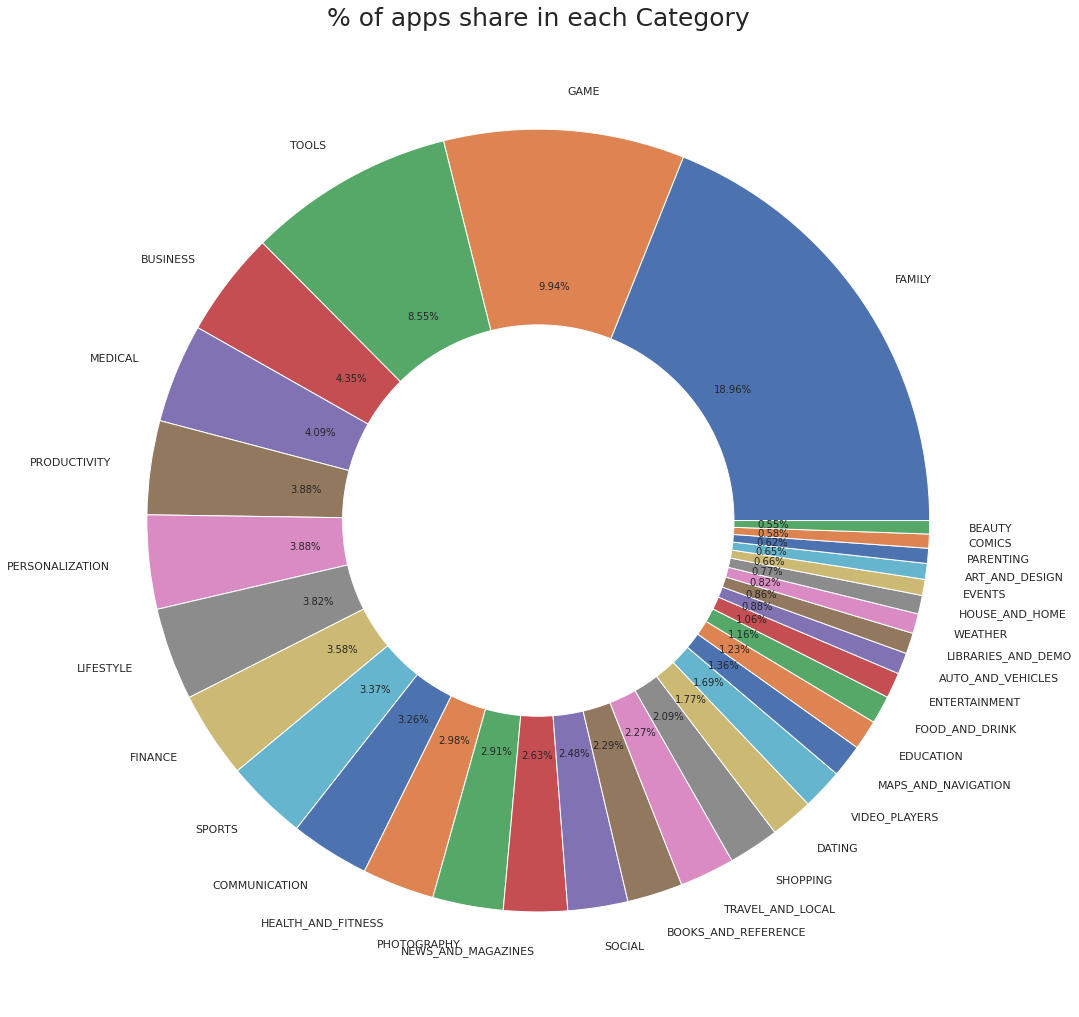

In [141]:
#Category
plt.figure(figsize=(18,18))
plt.pie(ps_df.Category.value_counts(), labels=ps_df.Category.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Category', fontsize = 25)
plt.show()

In [142]:
# We also rank in the top five categories. 
top5_categories=ps_df['Category'].value_counts(ascending=False).head().reset_index()
top5_categories

,index,Category
0,FAMILY,1829
1,GAME,959
2,TOOLS,825
3,BUSINESS,420
4,MEDICAL,395


Inference:

we see that family accounts for 18.97%(1829) of all of them, while games and tools account for 9.93%(959) and 8.56%(825) respectively.

# 2.What category of app is most installed by users?

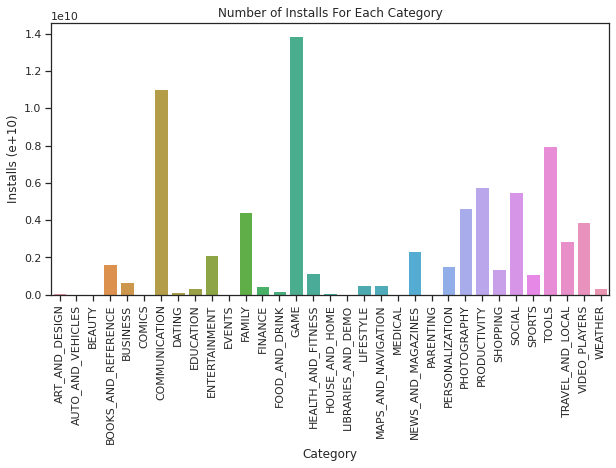

In [143]:
 #get the number of installs for each category
categories = ps_df.groupby('Category')
category_installs_sum_df = categories[['Installs']].sum()
category_installs_sum_df = category_installs_sum_df.reset_index()  # to convert groupby object into dataframe

plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Installs', data=category_installs_sum_df)
plt.xticks(rotation=90)
plt.ylabel('Installs (e+10)')
plt.title('Number of Installs For Each Category')
plt.show()

Inference:

the weightage of games and communication is much higher than all other categories.

# 3. Which apps install most in particular category?

In [144]:
def findtop10incategory(str):
    str = str.upper()
    top10 = ps_df[ps_df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(15,6), dpi=100)
    plt.title('Top 10 Installed Apps',size = 20)  
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs, palette= "viridis")
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

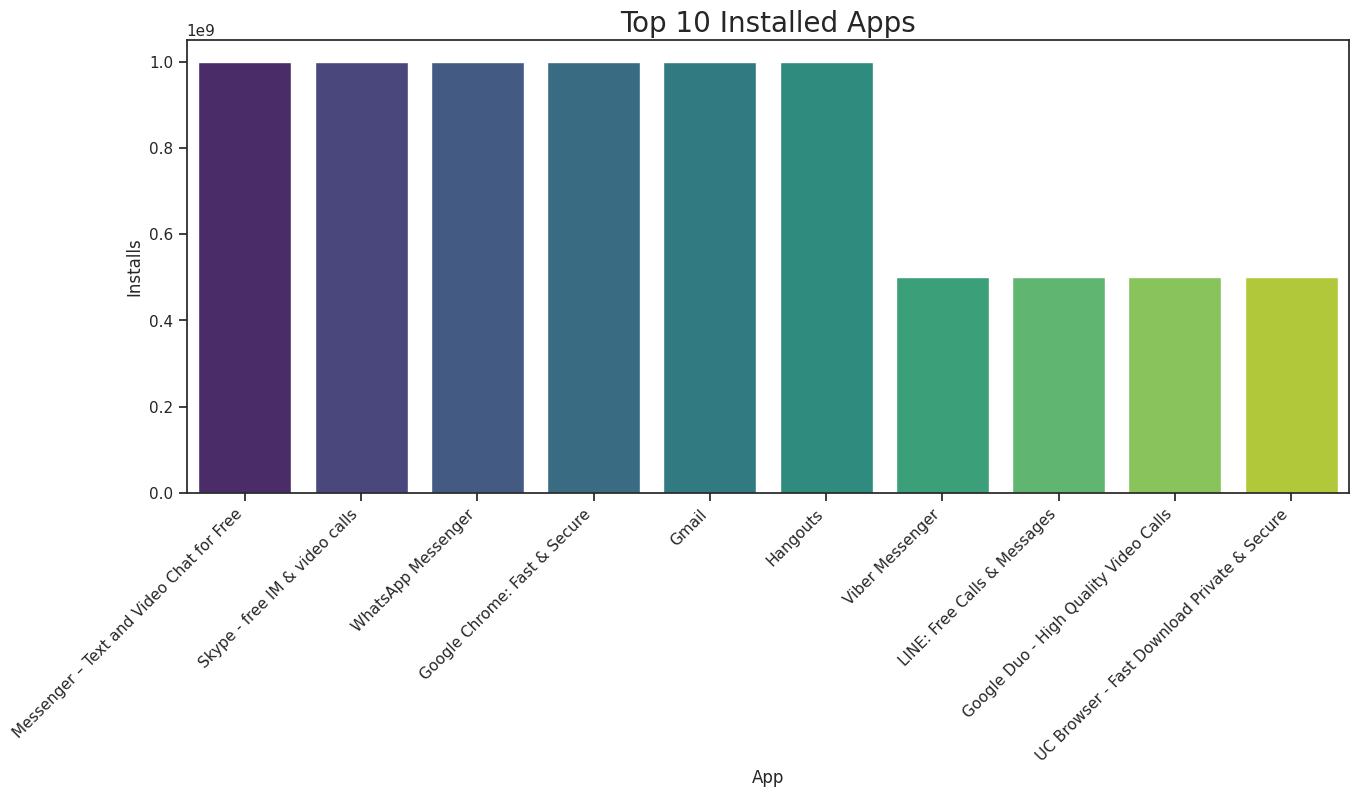

In [145]:
findtop10incategory('Communication')

Inference:
In the graph above, we can see that messenger, Skype, and Whatsapp have the most users in the communication category. 

## 4.Which category has the highest rating?

In [146]:
# make group of data according to category by groupby
category_group = ps_df.groupby('Category')
categories = ps_df.Category.unique()

In [147]:
rating = pd.DataFrame(round(category_group['Rating'].mean(),2).sort_values(ascending = False))

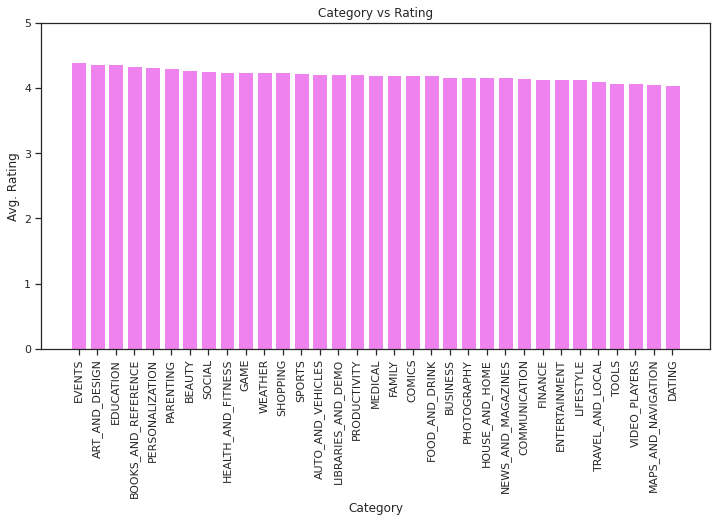

In [148]:
fig = plt.figure(figsize = (12,6))
plt.bar(rating.index, rating['Rating'], color = 'violet')
plt.xlabel('Category')
plt.xticks(rotation = 90)
plt.ylabel('Avg. Rating')
plt.yticks(range(0,6,1))
plt.title('Category vs Rating')
plt.show()
fig.savefig('Category vs Rating')


Inference:


Above we saw every category has a slightly similar rating. There is not much difference.

## 5.What is the average Ratings of Apps ?

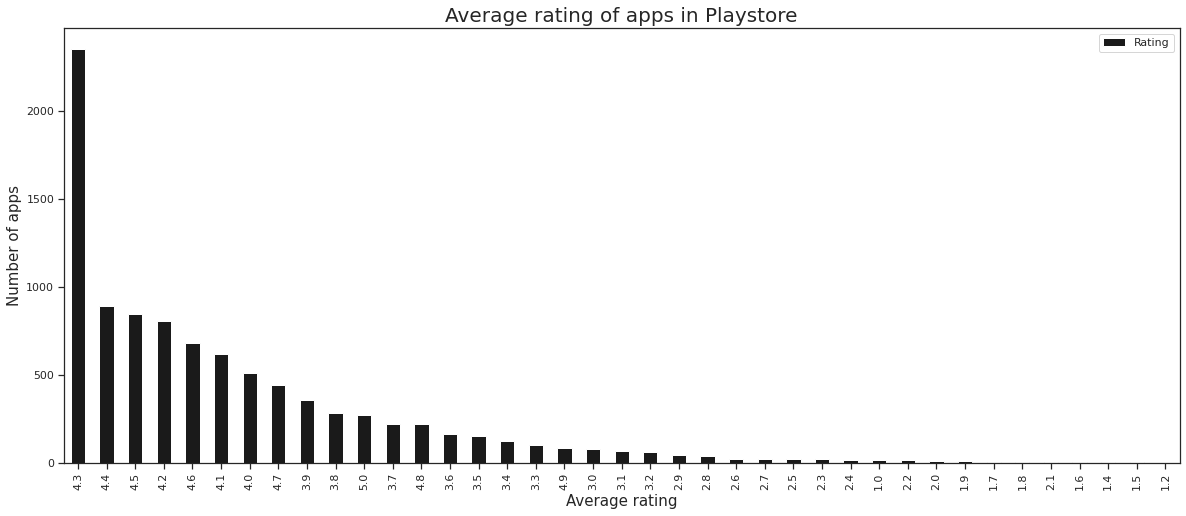

In [149]:
# Average app ratings

ps_df['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'k' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 20)
plt.legend();

Above the conclusion is that most of the people have given top Ratings between 3.5 to 4.8


4-5: Top rated

3-4: Above average

2-3: Average

1-2: Below average



## 6.How much does the app paid or how much is free?

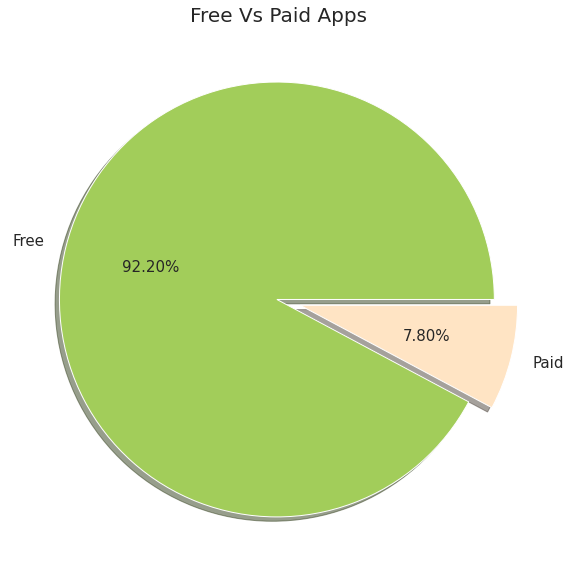

In [150]:
paid_or_free=ps_df['Type'].value_counts()
labels=ps_df['Type'].value_counts().index

#create pie chart 
plt.figure(figsize=(12,10))
colors=['#A2CD5A','#FFE4C4']
explode=(0.01,0.1)
plt.pie(paid_or_free,labels=labels,colors=colors,autopct='%.2f%%',explode=explode,shadow=True,textprops={'fontsize': 15})
plt.title('Free Vs Paid Apps',Size=20)
plt.show()

In [151]:
ps_df['Type'].value_counts()

Free    8896
Paid     753
Name: Type, dtype: int64

Inference: 

From the above graph we can see that 92% of apps in google play store are free and 8%are paid.

From the above data, we also see value counts of free and paid apps.

## 7.Free vs Paid category wise

In [152]:
type_group = ps_df.groupby('Type')

In [153]:
free_group = type_group.get_group('Free').groupby('Category')
free_perc = round((free_group.size()/category_group.size())*100,1)

In [154]:
paid_group = type_group.get_group('Paid').groupby('Category')
paid_perc = round((paid_group.size()/category_group.size())*100,1)

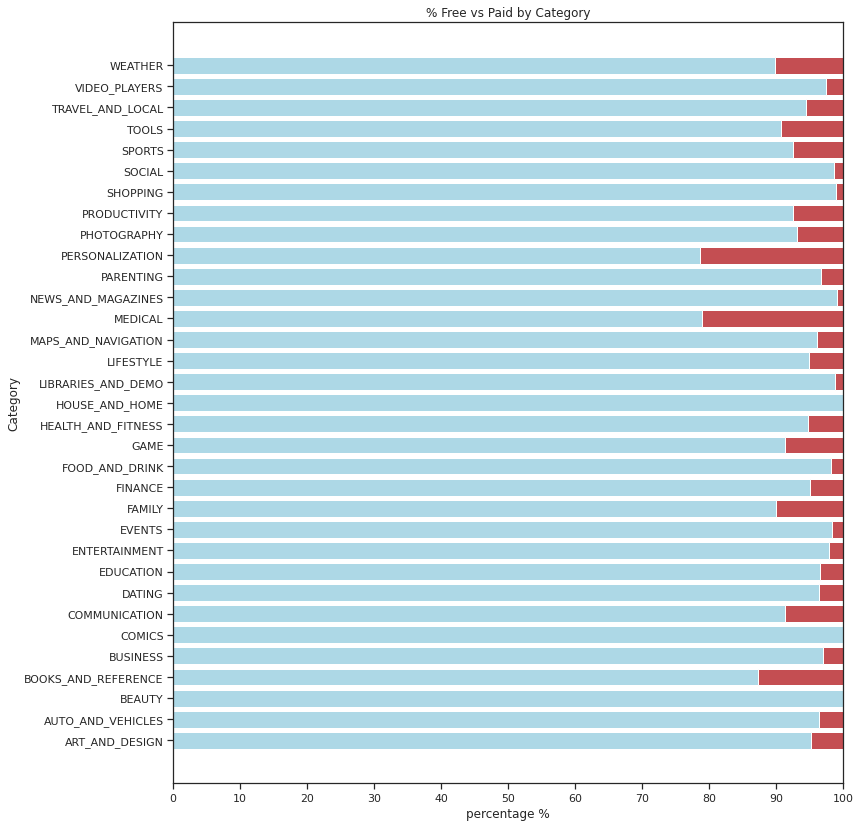

In [155]:
fig = plt.figure(figsize = (12,14))
plt.barh(free_perc.index, free_perc, color = 'lightblue')
plt.barh(free_perc.index, paid_perc, left =free_perc, color = 'r')
plt.xlabel('percentage %')
plt.xticks(range(0,110,10))
plt.ylabel('Category')
plt.title('% Free vs Paid by Category')
plt.show()
fig.savefig('% Free vs Paid by Category')

Inference:

Every category has more than 75 % of apps that are free for users.

## 8. Number of apps installed at particular price?

In [156]:
 #creating dataframe which contains only paid apps
paidType=ps_df[ps_df['Type']=='Paid']

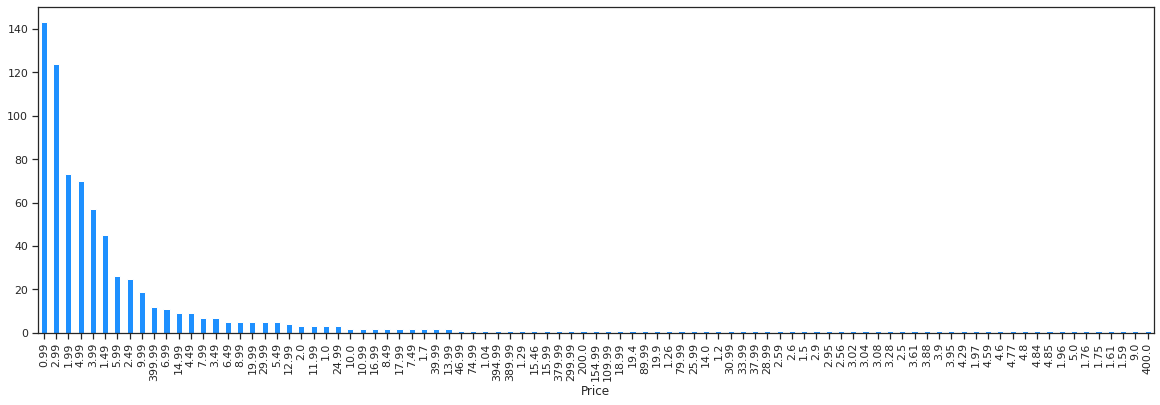

In [157]:
# Number of apps that can be installed at a particular price 

paidType.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,6), color = 'dodgerblue');

The paid apps charge the users a certain amount to download and install the app. This amount varies from one app to another.

There are a lot of apps that charge a small amount whereas some apps charge a larger amount. In this case the price to download an app varies from USD 0.99 to USD 400.

In order to select the top paid apps, it won't be fair to look just into the numer of installs. This is because the apps that charge a lower installation fee will be installed by more number of people in general.

Here a better way to determine the top apps in the paid category is by finding the revenue it generated through app installs.

This is given by:

Revenue generated through installs = (Number of installs)x(Price to install the app)

**Lets define a new column Revenue in paid_df which gives the revenue generated by the app through installs alone**

In [158]:
# Creatng a new column 'Revenue' in paid_df
paidType['Revenue'] = paidType['Installs']*paidType['Price']
paidType.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800000,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,499000.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000000,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,499000.0
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,0,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,399000.0
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,0,10000,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,39900.0
477,Calculator,DATING,2.6,57,6200000,1000,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up,6990.0


In [159]:
# Top app in the paid category

paidType[paidType['Revenue'] == paidType['Revenue'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
2241,Minecraft,FAMILY,4.5,2376564,0,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,69900000.0


In [160]:
# Top 10 paid apps in the play store
top10paid_apps=paidType.nlargest(10, 'Revenue', keep='first')
top10paid_apps['App']

2241                        Minecraft
5351                        I am rich
5356                I Am Rich Premium
4034                    Hitman Sniper
7417    Grand Theft Auto: San Andreas
2883              Facetune - For Free
5578          Sleep as Android Unlock
8804              DraStic DS Emulator
4367         I'm Rich - Trump Edition
4362                       💎 I'm rich
Name: App, dtype: object

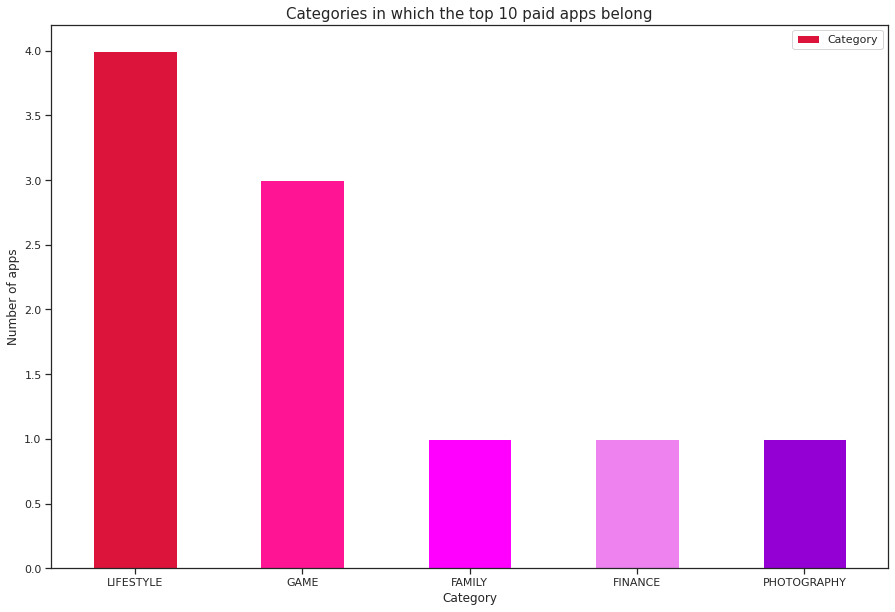

In [161]:
# Categories in which the top 10 paid apps belong to
top10paid_apps['Category'].value_counts().plot.bar(figsize=(15,10), color= ["crimson", "deeppink", "fuchsia", "violet", "darkviolet"])
plt.xlabel('Category',size=12)
plt.ylabel('Number of apps',size=12)
plt.title('Categories in which the top 10 paid apps belong', size=15)
plt.xticks(rotation=0)
plt.legend()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


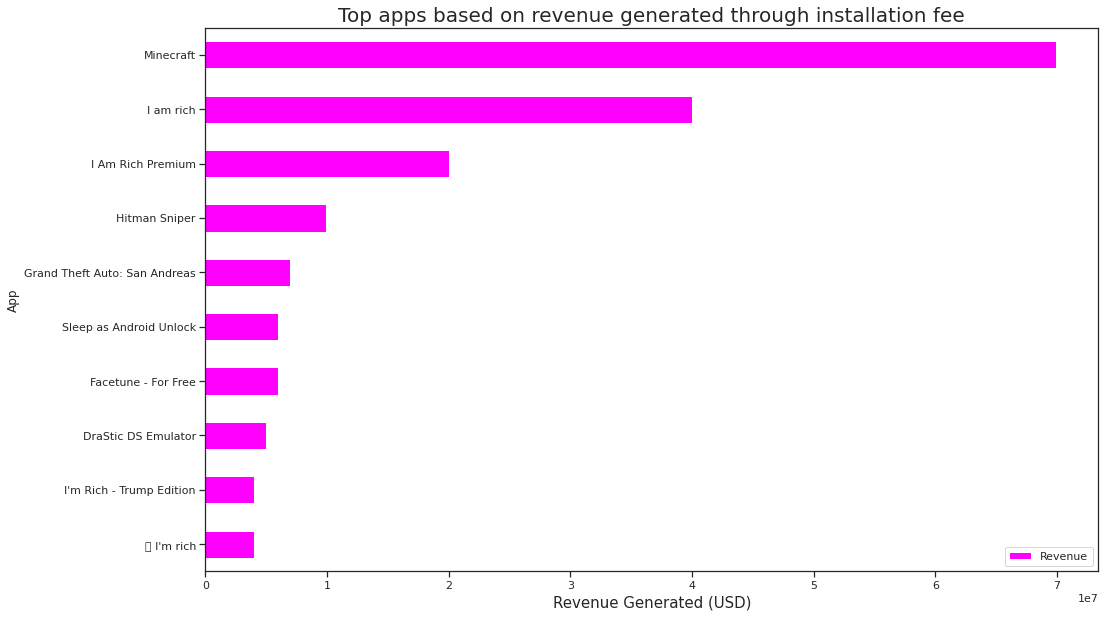

In [162]:
# Top paid apps according to the revenue generated through installs alone
top10paid_apps.groupby('App')['Revenue'].mean().sort_values(ascending= True).plot.barh(figsize=(16,10), color='fuchsia')
plt.xlabel('Revenue Generated (USD)', size=15)
plt.title('Top apps based on revenue generated through installation fee', size=20)
plt.legend();

In [163]:
# Paid apps with the highest number of installs
paidType[paidType['Revenue'] == paidType['Revenue'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
2241,Minecraft,FAMILY,4.5,2376564,0,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,69900000.0


Finally, we can plot the graph and find out which are the apps with the highest number of earnings.

Inference:


Top 10 Earning Apps are below in Google -

1)  Minecraft    

2)    I am rich

3)    I Am Rich Premium  


4)    Hitman Sniper    


5)    Grand Theft Auto: San Andreas 


6)    Facetune - For Free


7)    Sleep as Android Unlock


8)    DraStic DS Emulator


9)    I'm Rich - Trump Edition


10)    💎 I'm rich

## 9.Which category of Apps from the ‘Content Rating’ column is found more on the play store?

In [164]:
ps_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

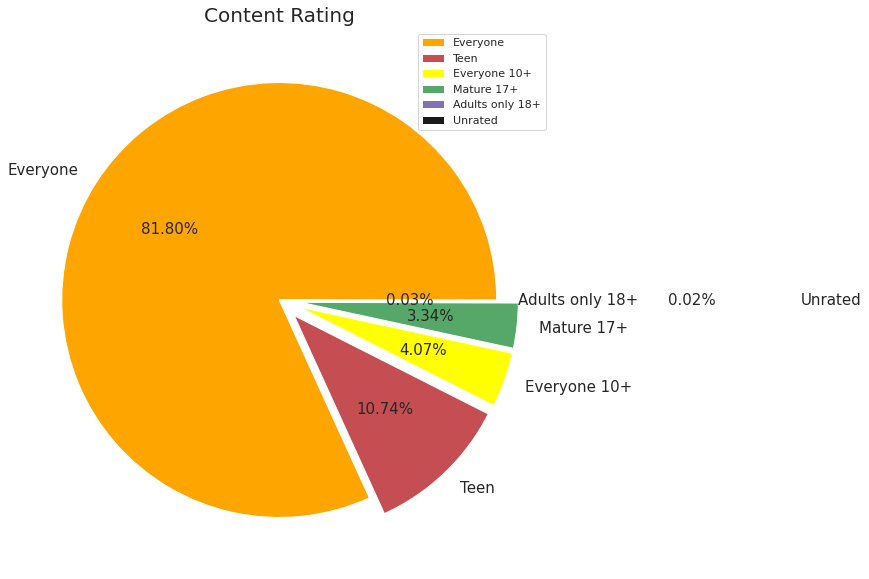

In [165]:
# Content rating of the apps
data = ps_df['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']

#create pie chart
plt.figure(figsize=(10,10))
explode=(0,0.1,0.1,0.1,0.0,1.3)
colors = ['orange', 'r', 'yellow', 'g', 'm', 'k']
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Content Rating',size=20,loc='center')
plt.legend();

In [166]:
ps_df['Content Rating'].value_counts()

Everyone           7893
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Inference:

Most of the applications are belongs to “Everyone” which means not restricted to age.


# 10.Distribution of apps in term of their rating, size and type.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


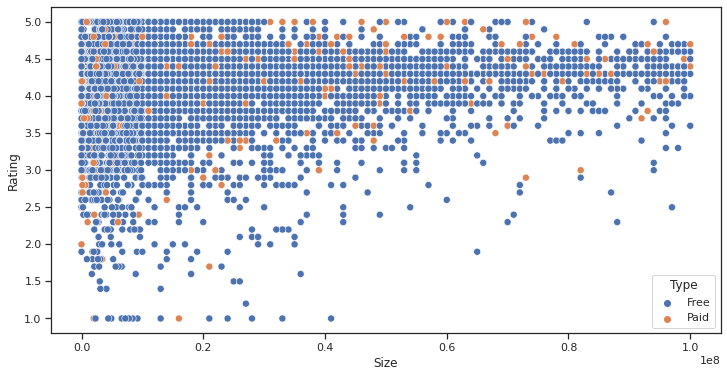

In [167]:
plt.figure(figsize=(12, 6))
sns.scatterplot(ps_df['Size'], ps_df['Rating'],hue=ps_df['Type'],s=50)

Inference:

 From this scatter plot, we can imply that majority of the free apps are small in size and having high rating. While for paid apps, we have quite equal distribution in term on size and rating.

## 11.Which app has the highest number of reviews?

In [168]:
Apps_with_Highest_rev = ps_df.sort_values(by='Reviews', ascending=False).head(20)
Apps_with_Highest_rev

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,0,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,0,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1670,Clash of Clans,GAME,4.6,44891723,98000000,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,0,500000000,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76000000,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,0,1000000000,Free,0.0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,0,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
1660,Clash Royale,GAME,4.6,23133508,97000000,100000000,Free,0.0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up


Text(0.5, 1.0, 'Top 20 apps with the highest number of user reviews')

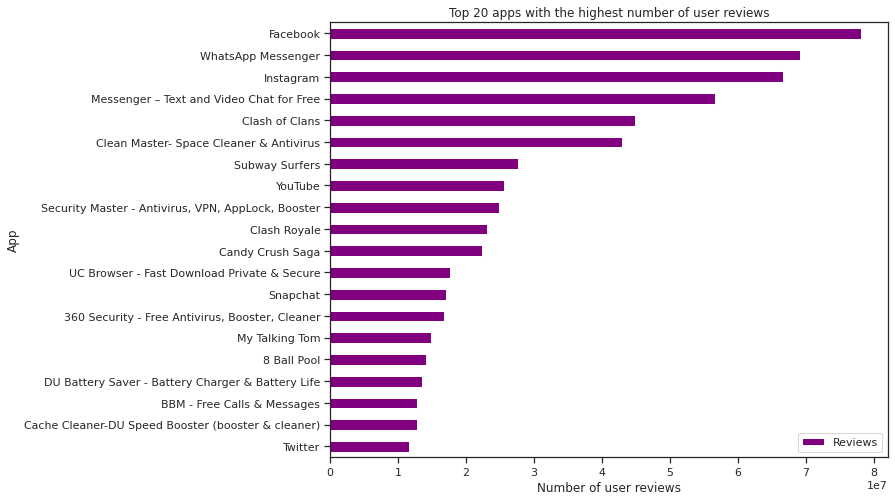

In [169]:
# Top apps with the highest number of user reviews

ps_df.groupby('App')[['Reviews','App']].sum().nlargest(20,['Reviews']).plot.barh(figsize = (10,8), color = 'purple').invert_yaxis()
plt.xlabel('Number of user reviews')
plt.title('Top 20 apps with the highest number of user reviews')

Inference:

We can conclude that "Facebook", "WhatsApp Messenger", "Instagram" are the top three apps have highest reviews.


## 12.Correlation between all the columns of the datasets.

In [170]:
# first check the correlation in playSdata
ps_df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.050212,0.027351,0.034306,-0.018674
Reviews,0.050212,1.000000,0.037814,0.625158,-0.007603
Size,0.027351,0.037814,1.000000,-0.007568,-0.015089
Installs,0.034306,0.625158,-0.007568,1.000000,-0.009412
Price,-0.018674,-0.007603,-0.015089,-0.009412,1.000000


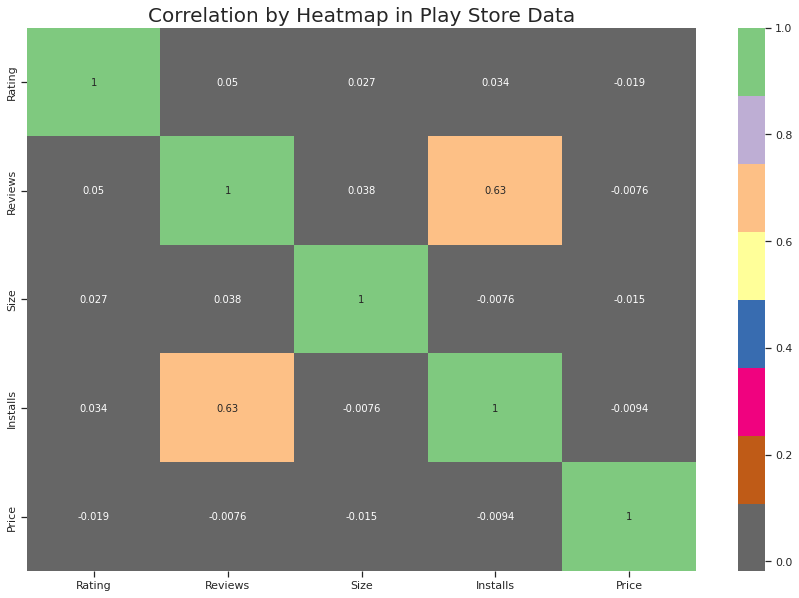

In [171]:
#plot a heatmap to see the correlaton between the columns
plt.figure(figsize=(15,10))
sns.heatmap(ps_df.corr(),annot=True, cmap='Accent_r')
plt.title("Correlation by Heatmap in Play Store Data",size='20');

Clearly, we saw that reviews and instals are more correlated and the value is 0.64. It is much more obvious that a higher number of instals has a higher number of reviews.

There is a negative correlation between price and instal apps, with the price of the app influencing the number of installation of the app.

# **Data Visualization Based on Users Review -:**

## 13. What is the Percentage of Sentiment Reviews?

In [172]:
ur_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

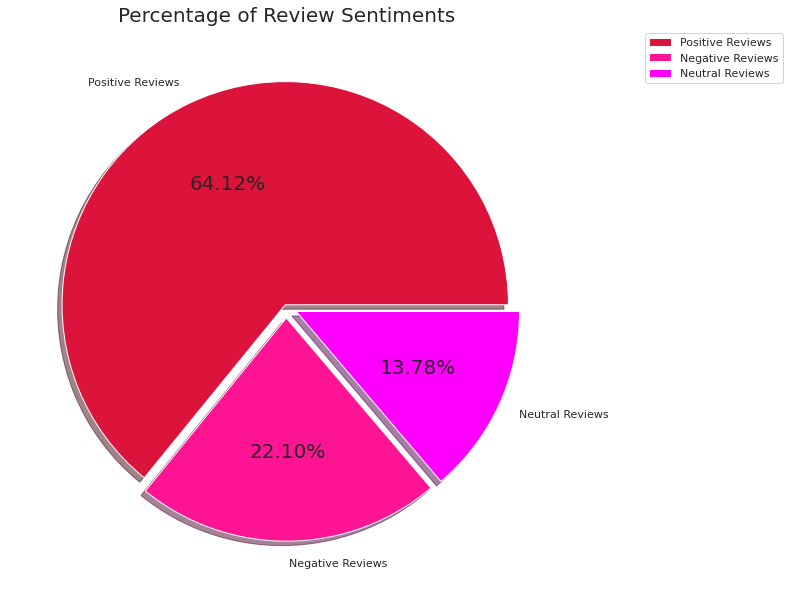

In [173]:
num_sentiment = list(ur_df['Sentiment'].value_counts())
labels = ['Positive Reviews','Negative Reviews','Neutral Reviews']
colors = ['crimson','deeppink','fuchsia']
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (10, 15)
plt.pie(num_sentiment, labels=labels, explode=[0.01, 0.05, 0.05],colors=colors, shadow=True, autopct='%.2f%%')
plt.title('Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()


Percentage of Review Sentiments-:

Positive Reviews = 64.12%

Negative Reviews = 22.10%

Neutral Reviews = 13.78%

## 14. Sentiment Analysis Based on Category

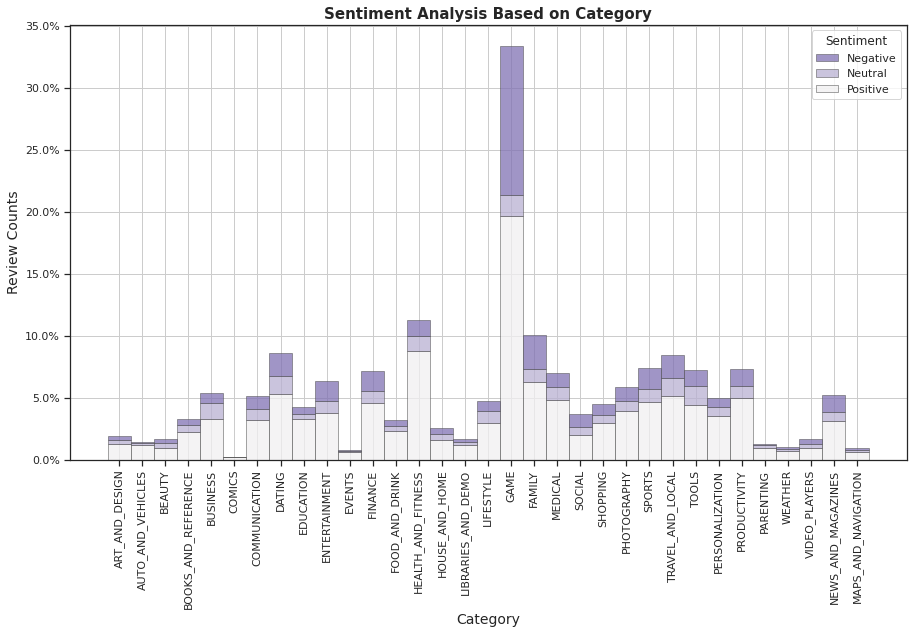

In [174]:
from matplotlib.ticker import PercentFormatter
merged_df = pd.merge(ps_df, ur_df, on='App', how = 'inner')
merged_df.head()
f = plt.figure(figsize=(15,8))
ax = f.add_subplot(1,1,1)
#sns.set_theme(style="ticks")

sns.histplot(
    data=merged_df,
    x="Category", hue="Sentiment",
    bins=34,
    ax=ax, 
    stat="count",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    legend=True
    )


ax.set_title("Sentiment Analysis Based on Category",fontsize=15,fontweight='bold')
plt.xticks(rotation='vertical')
ax.set_xlabel("Category",fontsize=14)
ax.set_ylabel("Review Counts",fontsize=14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(20000))
sns.set(style="ticks")
plt.grid()
plt.show()

Inference:

Here we notice that most of the reaction are from 'Game' catagory and very less from 'Comics', 'Events', 'Maps_And_Navigation' and 'Weather'.


-This shows that people take much interest in Game catagory app as compare to other apps.

# 15. Is sentiment_subjectivity proportional to sentiment_polarity ?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


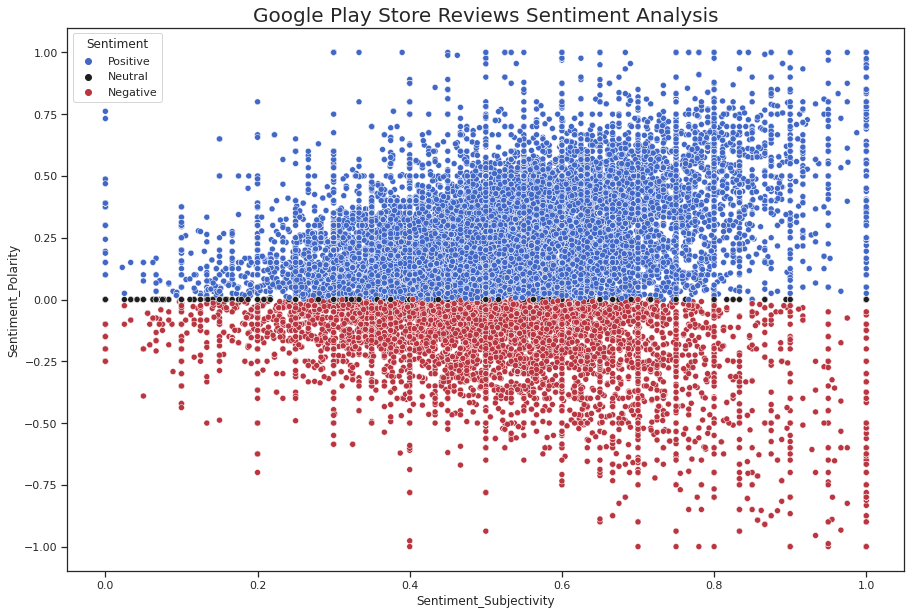

In [175]:
# scatterplot of sentiment polarity and sentiment subjectivity
plt.figure(figsize=(15, 10))
sns.scatterplot(ur_df['Sentiment_Subjectivity'], ur_df['Sentiment_Polarity'],
                hue = ur_df['Sentiment'], edgecolor='white', palette="icefire")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show();

Inference:


From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low

# Inference and Conclusion:

In this project of analysing play store applications, we have worked on several parameters and got some actionable insights that would help any organisation to do well in the Android market.

As per as EDA shown above,


1.   Most of the market is cover by 'FAMILY' category follows by 'GAME' and 'TOOLS'.

2.   The weightage of the intallation of the app, which belongs to the games and communication categories, is much higher than all other categories.we can see that messenger, Skype, and Whatsapp have the most users in the communication category

3.   After we compare category and rating.we saw every category has a slightly similar rating. There is not much difference.
4. Next we come to the average rating of the app, and we saw that most of the people have given top ratings of between 3.5 and 4.8.
5.We find that most of the apps are free of charge for users, and 75% of the apps are free in each category. 
6.We find there are a lot of apps that charge a small amount, whereas some apps charge a larger amount. In this case, the price to download an app varies from USD 0.99 to USD 400.

7. MINICRAFT, the app that creates the highest amount of revenue in the play store.
8.   Most of the applications are belongs to “Everyone” which means not restricted to age.Focusing more on content available for Everyone will increase the chances of getting the highest installs.
9.we can imply that majority of the free apps are small in size and having high rating. While for paid apps, we have quite equal distribution in term on size and rating.So we concentrated on free apps and sizes that are compatible with every Android device
10.We can also conclude that "Facebook", "WhatsApp Messenger", and "Instagram" are the top three apps that have the highest reviews.
11.We also found any correlation between all the columns and we found that instals and reviews are highly correlated, which concludes that a high number of instals has the highest number of reviews.
12.We saw the sentiments of the user review data, and we found most of the reviews are of positive sentiment, while negative and neutral sentiments have a low number of reviews.



13.Here we notice that most of the reaction are from 'Game' catagory and very less from 'Comics', 'Events', 'Maps_And_Navigation' and 'Weather'.
This shows that people take much interest in Game catagory app as compare to other apps.

14.From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low












